## Практична робота №5.Графи. Ациклічні графи
## Виконав: Буханцев Максим

### Задано ациклічний граф: {2, 4, 7, 10, 12}, {(2, 7), (4, 10), (7, 10), (4, 12)}

#### Візуалізація графа (через `networkx` + `matplotlib`)

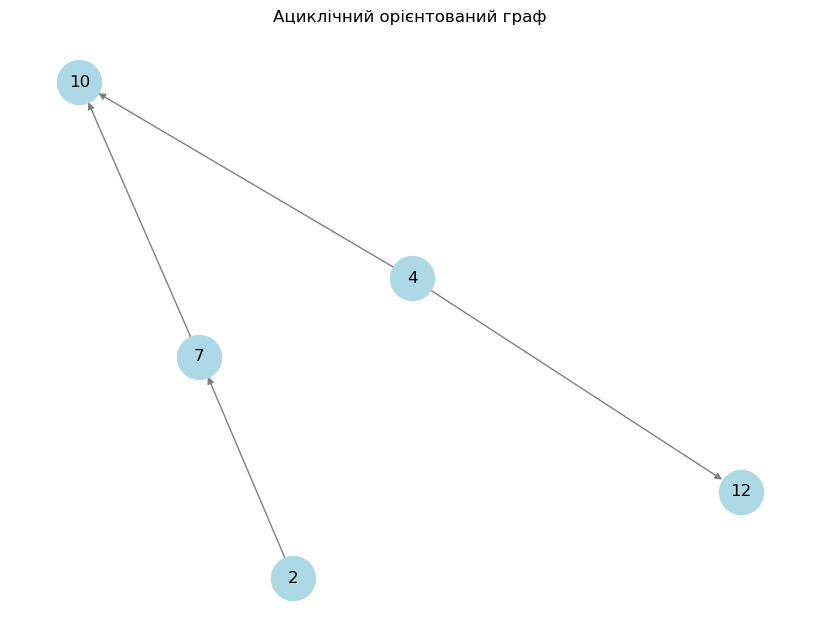

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [(2,7), (4,10), (7,10), (4,12)]

G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, arrows=True, node_color="lightblue", edge_color="gray", node_size=1000)
plt.title("Ациклічний орієнтований граф")
plt.show()

---

#### Топологічне сортування через DFS

In [7]:
def dfs_topological_sort(graph):
    visited = set()
    result = []

    def dfs(node):
        visited.add(node)
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                dfs(neighbor)
        result.append(node)

    for node in graph:
        if node not in visited:
            dfs(node)

    return result[::-1]

graph = {
    2: [7],
    4: [10, 12],
    7: [10],
    10: [],
    12: []
}

topo_order = dfs_topological_sort(graph)
print("Топологічне сортування:", topo_order)

Топологічне сортування: [4, 12, 2, 7, 10]


---

### Контрольні питання
#### 1. Переваги і недоліки алгоритму Кана vs DFS:
Кан: легко виявляє цикли (якщо залишаються вершини з вхідними ребрами — граф циклічний).
DFS: гнучкіший, легко вбудовується у рекурсивні системи.
Недолік DFS: складніше явно виявляти цикли (потрібна перевірка зворотних ребер).
Перевага Кана: зручно реалізовується через чергу без рекурсії.
#### 2. Складність (у найгіршому і найкращому випадках):
##### Алгоритм Кана:
Час: ( O(V + E) )
Пам’ять: ( O(V) )
##### Алгоритм DFS:
Час: ( O(V + E) )
Пам’ять: ( O(V) ) (через стек викликів)

#### 3. Чи можна застосовувати алгоритм Кана до графів з вагами?
Так, але ігноруючи ваги — вони не впливають на порядок.
Обидва алгоритми працюють з структурою графа, а не з вагами.

#### 4. Як структура графа впливає на швидкість:
Графи з великою кількістю ребер (густі) можуть уповільнити обидва алгоритми.
Кан може працювати швидше на графах з великим числом джерел.
DFS — стабільний для будь-яких структур, але рекурсія може бути глибокою.

#### 5. Обмеження:
Обидва алгоритми не працюють з графами, що містять цикли.
DFS вимагає обережності з глибиною рекурсії.
Кан потребує структури для зберігання вхідних ступенів.

#### 6. Оптимізації:
Для Кана: попередній підрахунок входів, використання deque для ефективної черги.
Для DFS: використання циклічного обходу замість рекурсії для великих графів.
